In [1]:
# 匯入套件和金鑰
import os
from rich import print as pprint
from langchain_openai import ChatOpenAI
from tqdm import tqdm
import networkx as nx
import matplotlib.pyplot as plt

from dotenv import load_dotenv
load_dotenv()

from langchain_experimental.graph_transformers import LLMGraphTransformer
from langchain_community.document_loaders import PyPDFLoader


# LLM Model

In [2]:

llm=ChatOpenAI(temperature=0, model_name="gpt-3.5-turbo-0125") # gpt-4o/"gpt-3.5-turbo-0125"
llm_transformer = LLMGraphTransformer(llm=llm)

# Load Document

In [3]:
# load PDF file
pdf_filepath = '/Users/weikai/Library/CloudStorage/Dropbox/paper/CCWu'
pdf_filenames = [\
    'CCWu 2021 Modified distributed Bragg reflector for protecting organic light-emitting diode displays against ultraviolet light.pdf',
    'CCWu 2022 Analyses of emission efficiencies of white organic light-emitting diodes having multiple emitters in single emitting layer.pdf',
    'CCWu 2019 Three‐dimensional pixel configurations for optical outcoupling of OLED displays-optical simulation.pdf',
    'CCWu 2013 Analyzing nanostructures in mesogenic host–guest systems for polarized phosphorescence.pdf',
    'CCWu 2022 Analyses of emission efficiencies of white organic light-emitting diodes having multiple emitters in single emitting layer.pdf',
    'CCWu 2023 Fully electromagnetic wave optic simulation and analyses of the cross-scale reflective 3D OLED pixel configuration.pdf',
    'CCWu 2022 Using angle-selective optical film to enhance the light extraction of a thin-film encapsulated 3D reflective pixel for OLED displays.pdf',
    'CCWu 2022 P-128 Optimizing OLED Pixel Structures for Consistently Low Ambient Light Reflection over Viewing Angles.pdf',
    'CCWu 2020 Integrating Molecular Rigidity and Chirality into TADF for Highly Efficient Sky-Blue CPEL.pdf',
    'CCWu 2020 High-efficiency organic light emitting diodes using high-index transparent electrode.pdf',
    'CCWu 2019 SID P-179 Optics of Curved OLEDs.pdf',
    'CCWu 2020 Enhance external quantum efficiency of organic light-emitting devices using thin transparent electrodes.pdf',
    'CCWu 2016 Triboluminescence and Metal Phosphor for Organic Light-Emitting Diodes Functional Pt(II) Complexes with Both 2‑Pyridylimidazol-2-ylidene and Bipyrazolate Chelates.pdf',
    'CCWu 2018 Quantitative analyses of high electroluminescence efficiency of thermally activated delayed fluorescence emitters based on acridine–triazine hybrids.pdf',
    'CCWu 2017 Achieving Nearly 30% External Quantum Efﬁciency for Orange–Red Organic Light Emitting Diodes by Employing Thermally Activated Delayed Fluorescence Emitters  Composed of 1,8-Naphthalimide-Acridine Hybrids.pdf',
    'CCWu 2016 Efﬁcient and Tunable Thermally Activated Delayed Fluorescence Emitters Having Orientation-Adjustable  CN-Substituted Pyridine and Pyrimidine Acceptor Units.pdf'
]

# pdf_filepath = '/Users/weikai/Library/CloudStorage/Dropbox/paper/CCWu'
# pdf_filenames = [ fname for fname in os.listdir(pdf_filepath) if fname.endswith('.pdf') ]


In [4]:
# to documents
docs = []
for pdf_filename in tqdm(pdf_filenames):
    loader = PyPDFLoader(file_path=os.path.join(pdf_filepath, pdf_filename))
    docs += loader.load()
print(f"Loaded {len(docs)} documents")

100%|██████████| 16/16 [00:11<00:00,  1.39it/s]

Loaded 182 documents


# To graph

In [5]:
graph_documents = llm_transformer.convert_to_graph_documents( docs[:5] )

In [6]:
pprint(graph_documents)

[
    GraphDocument(
        nodes=[
            Node(id='Kai-Chen Lin', type='Person'),
            Node(id='Wei-Kai Lee', type='Person'),
            Node(id='Bo-Kai Wang', type='Person'),
            Node(id='Yu-Hsing Lin', type='Person'),
            Node(id='Hsien-Hung Chen', type='Person'),
            Node(id='Yi-Hwa Song', type='Person'),
            Node(id='Yu-Hsin Huang', type='Person'),
            Node(id='Li-Wei Shih', type='Person'),
            Node(id='Chung-Chi Wu', type='Person'),
            Node(id='Graduate Institute Of Electronics Engineering', type='Organization'),
            Node(id='Graduate Institute Of Photonics And Optoelectronics', type='Organization'),
            Node(id='Department Of Electrical Engineering, National Taiwan University', type='Organization'),
            Node(id='Au Optronics Corporation', type='Organization'),
            Node(id='National Taiwan University', type='Organization'),
            Node(id='Optics Express', type='Publication'),
            Node(id='Organic Light-Emitting Diode (Oled)', type='Technology'),
            Node(id='Ultraviolet (Uv) Light', type='Concept'),
            Node(id='High Energy Visible (Hev) Light', type='Concept'),
            Node(id='Distributed Bragg Reflector (Dbr)', type='Technology')
        ],
        relationships=[
            Relationship(
                source=Node(id='Kai-Chen Lin', type='Person'),
                target=Node(id='Graduate Institute Of Electronics Engineering', type='Organization'),
                type='AFFILIATION'
            ),
            Relationship(
                source=Node(id='Wei-Kai Lee', type='Person'),
                target=Node(id='Graduate Institute Of Electronics Engineering', type='Organization'),
                type='AFFILIATION'
            ),
            Relationship(
                source=Node(id='Bo-Kai Wang', type='Person'),
                target=Node(id='Graduate Institute Of Electronics Engineering', type='Organization'),
                type='AFFILIATION'
            ),
            Relationship(
                source=Node(id='Yu-Hsin Huang', type='Person'),
                target=Node(id='Graduate Institute Of Electronics Engineering', type='Organization'),
                type='AFFILIATION'
            ),
            Relationship(
                source=Node(id='Chung-Chi Wu', type='Person'),
                target=Node(id='Graduate Institute Of Electronics Engineering', type='Organization'),
                type='AFFILIATION'
            ),
            Relationship(
                source=Node(id='Kai-Chen Lin', type='Person'),
                target=Node(id='Graduate Institute Of Photonics And Optoelectronics', type='Organization'),
                type='AFFILIATION'
            ),
            Relationship(
                source=Node(id='Wei-Kai Lee', type='Person'),
                target=Node(id='Graduate Institute Of Photonics And Optoelectronics', type='Organization'),
                type='AFFILIATION'
            ),
            Relationship(
                source=Node(id='Bo-Kai Wang', type='Person'),
                target=Node(id='Graduate Institute Of Photonics And Optoelectronics', type='Organization'),
                type='AFFILIATION'
            ),
            Relationship(
                source=Node(id='Yu-Hsin Huang', type='Person'),
                target=Node(id='Graduate Institute Of Photonics And Optoelectronics', type='Organization'),
                type='AFFILIATION'
            ),
            Relationship(
                source=Node(id='Chung-Chi Wu', type='Person'),
                target=Node(id='Graduate Institute Of Photonics And Optoelectronics', type='Organization'),
                type='AFFILIATION'
            ),
            Relationship(
                source=Node(id='Kai-Chen Lin', type='Person'),
                target=Node(
                    id='Department Of Electrical Engineering, National Taiwan University',
                    type

In [7]:
def create_networkx_graph(graph_documents):
    G = nx.DiGraph()

    # Add nodes and edges to the graph
    for doc in graph_documents:
        for node in doc.nodes:
            if node.id:  # Use only the id for labels
                G.add_node(str(node.id), label=node.id)

        for relationship in doc.relationships:
            if relationship.source and relationship.target:  # Ensure relationships are valid
                G.add_edge(str(relationship.source.id), str(relationship.target.id), label=relationship.type)

    return G
def visualize_networkx_graph(G):
    # Identify all nodes that are sources of relationships
    source_nodes = set(G.predecessors(node) for node in G.nodes)

    # Get positions for the nodes
    pos = nx.spring_layout(G, k=20, iterations=200, center=(0.5, 0.5))  # Increase k value for more spacing

    # Nodes with sizes based on their degree, reduced size
    node_sizes = [300 + 100 * G.degree(node) for node in G.nodes]
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')

    # Ensure every node has a label, defaulting to the node ID
    node_labels = {node: G.nodes[node].get('label', node) for node in G.nodes}

    # Node labels with increased font size and padding
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8, font_family='sans-serif',
                            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # Edges
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=2, edge_color='gray')

    plt.title("Knowledge Graph", fontsize=20)
    plt.figure(figsize=(15, 10))  # Increase figure size
    plt.axis('off')  # Hide axis
    plt.show()



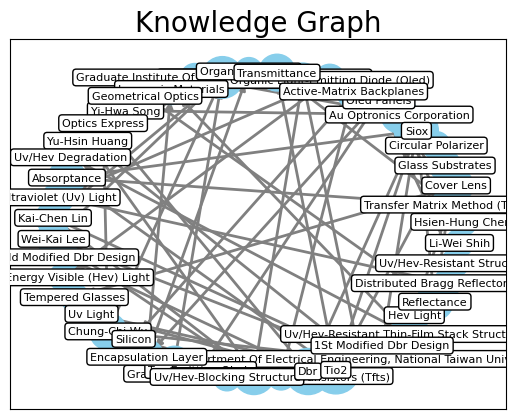

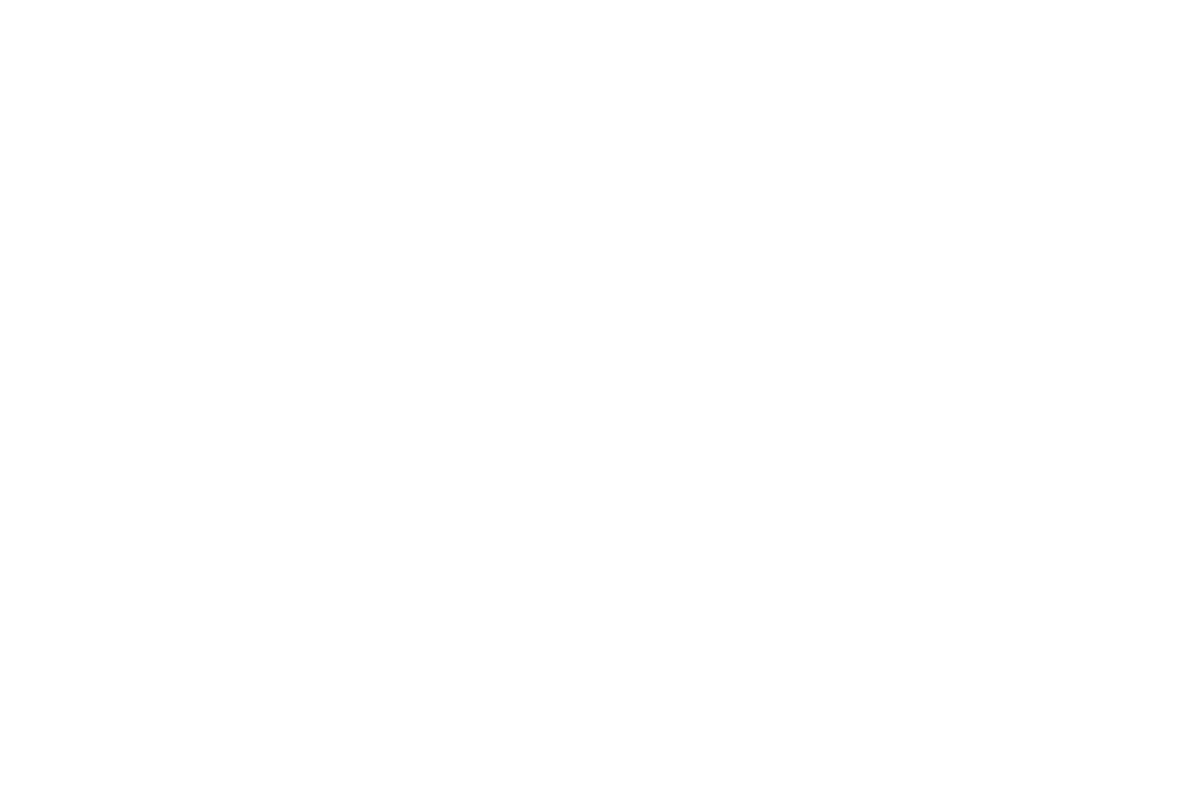

In [8]:
G = create_networkx_graph(graph_documents)
visualize_networkx_graph(G)